In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#훈련시간 x와 경기력 y의 리스트
data = [[3,35], [4,50], [5,45], [6,64], [7,66], [8,70]]
x=[i[0] for i in data]
y=[i[1] for i in data]
print(x,y)

[3, 4, 5, 6, 7, 8] [35, 50, 45, 64, 66, 70]


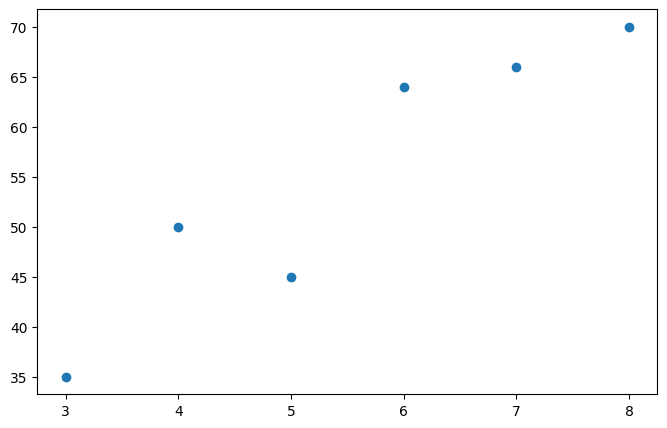

In [2]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [3]:
#리스트로 되어 있는 x와 y를 넘파이 배열로 변경
x_data=np.array(x)
y_data=np.array(y)
print(x_data, y_data)

#기울기와 절편 초기화
a=0
b=0

#학습률 및 반복
lr=0.01
epochs=10000

#경사하강법 시작
for i in range(epochs):
    y_pred=a*x_data+b
    error=y_data-y_pred
    
    #오차함수를 기울기로 미분
    a_diff = -(2/len(x_data)) * sum(x_data * (error))
    #오차함수를 절편으로 미분
    b_diff = -(2/len(x_data)) * sum(error)
    
    a = a - lr * a_diff #학습률 곱을 a에 업데이트
    b = b - lr * b_diff #학습률 곱을 b에 업데이트
    
    if i % 1 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

[3 4 5 6 7 8] [35 50 45 64 66 70]
epoch=0, 기울기=6.4533, 절편=1.1000
epoch=1, 기울기=8.5050, 절편=1.4681
epoch=2, 기울기=9.1552, 절편=1.6032
epoch=3, 기울기=9.3592, 절편=1.6641
epoch=4, 기울기=9.4212, 절편=1.7013
epoch=5, 기울기=9.4380, 절편=1.7309
epoch=6, 기울기=9.4404, 절편=1.7581
epoch=7, 기울기=9.4382, 절편=1.7845
epoch=8, 기울기=9.4346, 절편=1.8106
epoch=9, 기울기=9.4305, 절편=1.8366
epoch=10, 기울기=9.4262, 절편=1.8625
epoch=11, 기울기=9.4220, 절편=1.8884
epoch=12, 기울기=9.4177, 절편=1.9142
epoch=13, 기울기=9.4134, 절편=1.9400
epoch=14, 기울기=9.4091, 절편=1.9657
epoch=15, 기울기=9.4048, 절편=1.9914
epoch=16, 기울기=9.4006, 절편=2.0170
epoch=17, 기울기=9.3963, 절편=2.0426
epoch=18, 기울기=9.3921, 절편=2.0682
epoch=19, 기울기=9.3878, 절편=2.0937
epoch=20, 기울기=9.3836, 절편=2.1192
epoch=21, 기울기=9.3794, 절편=2.1446
epoch=22, 기울기=9.3751, 절편=2.1700
epoch=23, 기울기=9.3709, 절편=2.1953
epoch=24, 기울기=9.3667, 절편=2.2206
epoch=25, 기울기=9.3625, 절편=2.2458
epoch=26, 기울기=9.3583, 절편=2.2710
epoch=27, 기울기=9.3542, 절편=2.2962
epoch=28, 기울기=9.3500, 절편=2.3213
epoch=29, 기울기=9.3458, 절편=2.3464
epoch=30, 기울기=9.

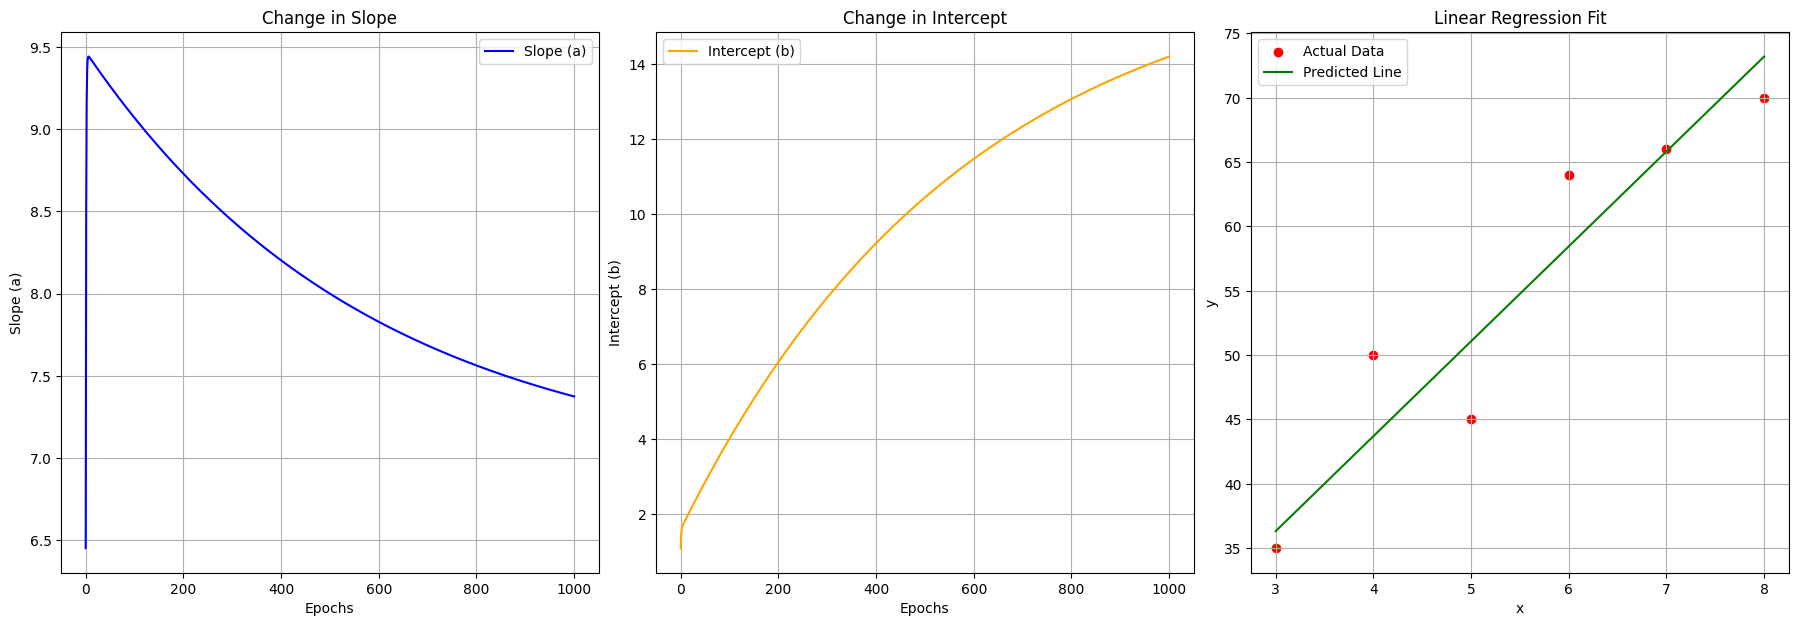

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Sample data definition
x = [3, 4, 5, 6, 7, 8]  # Input data
y = [35, 50, 45, 64, 66, 70]  # Output data (non-linear relationship)

# Convert lists x and y to numpy arrays
x_data = np.array(x)
y_data = np.array(y)

# Initialize slope and intercept
a = 0
b = 0

# Learning rate and number of iterations
lr = 0.01  # Learning rate
epochs = 1000  # Maximum number of epochs
tolerance = 0.01  # Convergence tolerance

# Lists to store the changes in slope and intercept
a_values = []
b_values = []

# Gradient descent to update slope and intercept
def gradient_descent(i):
    global a, b

    # Calculate predicted values
    y_pred = a * x_data + b
    error = y_data - y_pred

    # Derivative of the cost function with respect to slope
    a_diff = -(2 / len(x_data)) * sum(x_data * (error))
    # Derivative of the cost function with respect to intercept
    b_diff = -(2 / len(x_data)) * sum(error)

    # Check for convergence
    if abs(a_diff) < tolerance and abs(b_diff) < tolerance:
        print(f"Converged at epoch {i}")
        ani.event_source.stop()  # Stop the animation if convergence is achieved
        return

    # Update slope and intercept
    a = a - lr * a_diff
    b = b - lr * b_diff

    # Append updated slope and intercept values to the lists
    a_values.append(a)
    b_values.append(b)

    # Update graphs
    ax1.clear()
    ax2.clear()
    ax3.clear()

    ax1.plot(range(len(a_values)), a_values, label='Slope (a)', color='blue')
    ax1.set_title('Change in Slope')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Slope (a)')
    ax1.legend()
    ax1.grid()

    ax2.plot(range(len(b_values)), b_values, label='Intercept (b)', color='orange')
    ax2.set_title('Change in Intercept')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Intercept (b)')
    ax2.legend()
    ax2.grid()

    # Visualize linear regression line (data and predicted line)
    ax3.scatter(x_data, y_data, color='red', label='Actual Data')  # Actual data points
    ax3.plot(x_data, y_pred, color='green', label='Predicted Line')  # Current predicted line
    ax3.set_title('Linear Regression Fit')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.legend()
    ax3.grid()

# Plot settings
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.tight_layout()

# Animation settings
ani = FuncAnimation(fig, gradient_descent, frames=epochs, repeat=False)

# Save the animation as a GIF with a lower fps
ani.save("gradient_descent_convergence.gif", writer=PillowWriter(fps=20))  # Lower fps for faster saving

# Show the animation
plt.show()


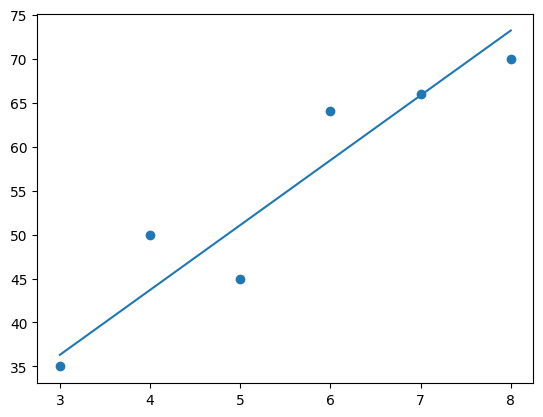

In [5]:
#그래프 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)],[min(y_pred), max(y_pred)])
plt.show()